# Initial setting

In [1]:
%matplotlib inline

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

np.random.seed(2019)
#tf.random.set_seed(0)

train_data_dir = 'data/train'
valid_data_dir = 'data/validation'

img_width = 100
img_height = 100

batch_size = 32
epoch_num = 14
image_gen_num = 5 #image generatorで学習画像を何倍に水増しするか

/home/nao/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nao/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nao/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nao/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

# Create ImageData

In [2]:
train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['Glyffindor','Hufflpuff','Ravenclaw','Slytherin'],
                                              batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(directory=valid_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['Glyffindor','Hufflpuff','Ravenclaw','Slytherin'],
                                              batch_size=batch_size)

Found 480 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


# Create the deep learning layer

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), #layer size, pixel size
                        padding='same',
                        #kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True,
                        activation='relu',
                        input_shape=(img_width, img_height, 3),
                        name='conv_filter1-1'))
model.add(layers.MaxPooling2D((2, 2),
                              name='max_pooling1'))

model.add(layers.Conv2D(32, (3, 3), #layer size, pixel size
                        padding='same',
                        #kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True,
                        activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2),
                              name='max_pooling2'))

model.add(layers.Conv2D(64, (3, 3), #layer size, pixel size
                        padding='same',
                        #kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.MaxPooling2D((2, 2),
                              name='max_pooling3'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512,
                       activation='relu',
                       #kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5,
                         name='dropout1'))
model.add(layers.Dense(4, #output layer size
                       activation='softmax',
                       name='softmax'))


model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 50, 50, 32)        0         
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 25, 25, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling3 (MaxPooling2D)  (None, 12, 12, 64)        0         
____

# Trainning

Epoch 1/14
75/75 [==============================] - 7s 90ms/step - loss: 1.3914 - acc: 0.2633 - val_loss: 1.3737 - val_acc: 0.2647
Epoch 2/14
75/75 [==============================] - 5s 72ms/step - loss: 1.3493 - acc: 0.3417 - val_loss: 1.2504 - val_acc: 0.4393
Epoch 3/14
75/75 [==============================] - 5s 73ms/step - loss: 1.2745 - acc: 0.4212 - val_loss: 1.1373 - val_acc: 0.4724
Epoch 4/14
75/75 [==============================] - 6s 76ms/step - loss: 1.1407 - acc: 0.5083 - val_loss: 1.0150 - val_acc: 0.5570
Epoch 5/14
75/75 [==============================] - 6s 76ms/step - loss: 0.9738 - acc: 0.5946 - val_loss: 0.9716 - val_acc: 0.6140
Epoch 6/14
75/75 [==============================] - 6s 77ms/step - loss: 0.8589 - acc: 0.6438 - val_loss: 0.7778 - val_acc: 0.6838
Epoch 7/14
75/75 [==============================] - 6s 75ms/step - loss: 0.7159 - acc: 0.7171 - val_loss: 0.7108 - val_acc: 0.7445
Epoch 8/14
75/75 [==============================] - 6s 79ms/step - loss: 0.6132 - a

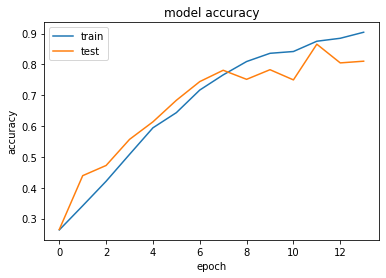

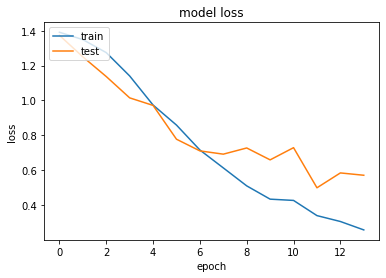

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=(480 * image_gen_num) // batch_size,
                              validation_steps=(120 * image_gen_num) // batch_size,
                              epochs=epoch_num)

#正答率
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [5]:
model.save('model/sorting_deep_hat.h5', save_format='h5')

# Check

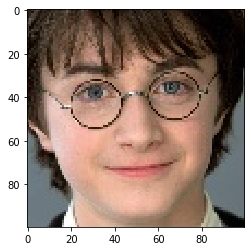

You are "Glyffindor" !!


In [8]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import models
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def sort(model, filepath):
    image=cv2.imread(filepath)

    b,g,r = cv2.split(image)
    x = cv2.merge([r,g,b])
    x = cv2.resize(x,(100, 100))
    x = np.array([x / 255.])

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    nameNumLabel=np.argmax(model.predict(x))
    if nameNumLabel== 0: 
        print('You are "Glyffindor" !!')
    elif nameNumLabel==1:
        print('You are "Hufflpuff" !!')
    elif nameNumLabel==2:
        print('You are "Ravenclaw" !!')
    elif nameNumLabel==3:
        print('You are "Slytherin" !!')


model = models.load_model('model/sorting_deep_hat.h5')

filepath = 'data/validation/Glyffindor/fb7b32ea72330a9c944c788eed9bcd05_0.jpg'
sort(model, filepath)

#filepath = 'data/validation/Hufflpuff/f1b642e619c2443d5d7458099468ccb1_0.jpg'
#sort(model, filepath)

#filepath = 'data/validation/Ravenclaw/f82cc187e480d1481b956eef6a8f0f85_0.jpg'
#sort(model, filepath)

#filepath = 'data/validation/Slytherin/cc270cb23f6556fb4e2d692221b2f617_0.jpg'
#sort(model, filepath)